# Data and Setup

In [1]:
#Importing numpy and pandas

import numpy as np
import pandas as pd

In [2]:
#Importing visualization libraries and setting %matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Reading in the csv file as a dataframe called df

df=pd.read_csv(r"C:\Users\hp\Desktop\DATA ANALYTICS COURSE-PYTHON\911.csv")

In [4]:
#Checking the info() of the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
#Checking the head of df

df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
#Checking the head of df

df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


# Basic Questions

In [7]:
#What are the top 5 zipcodes for 911 calls?

df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
#What are the top 5 townships for 911 calls?

df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [9]:
#Take a look at the 'title' column, how many unique title codes are there?

df['title'].nunique()

110

# Creating new features

In [10]:
#In the titles column there are "Reasons/Departments" specified before the title code.
#These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to
#create a new column called "Reason" that contains this string value.For example, if 
#the title column value is EMS: BACK PAINS/INJURY , the Reason
#column value would be EMS

df['Reason']=df['title'].apply(lambda x:x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [11]:
#What is the most common Reason for a 911 call based off of this new column?

df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

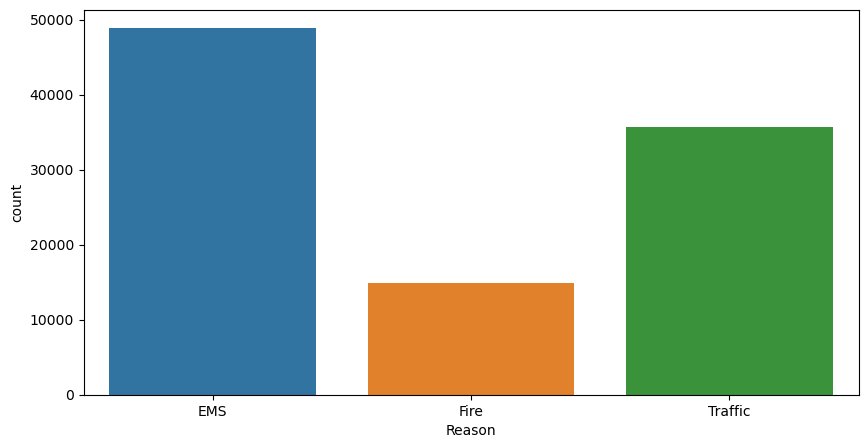

In [12]:
#Now use seaborn to create a countplot of 911 calls by Reason.

plt.figure(figsize=(10,5))
sns.countplot(x='Reason', data=df)

In [13]:
#Now let us begin to focus on time information. What is the data type of the objects in
#the timeStamp column?

type(df['timeStamp'][0])


str

In [14]:
#You should have seen that these timestamps are still strings. Use pd.to_datetime to
#convert the column from strings to DateTime objects.

df['timeStamp']=pd.to_datetime(df['timeStamp'])
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
#You can now grab specific attributes from a Datetime object by calling them. For
#example:

time = df['timeStamp'].iloc[0]
time.hour



17

In [16]:
time.day



10

In [17]:
time.month


12

In [18]:
time.year

2015

In [19]:
time.minute

40

In [20]:
#You can use Jupyter's tab method to explore the various attributes you can call. Now
#that the timestamp column are actually DateTime objects, use .apply() to create 3 new
#columns called Hour, Month, and Day of Week. You will create these columns based
#off of the timeStamp column, reference the solutions if you get stuck on this step.

df['hour']=df['timeStamp'].apply(lambda x:x.hour)
df['month']=df['timeStamp'].apply(lambda x:x.month)
df['day of week']=df['timeStamp'].apply(lambda x:x.day_of_week)

In [21]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [22]:
#Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to
#map the actual string names to the day of the week:

df['day of week']=df['day of week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})


In [23]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


<Axes: xlabel='day of week', ylabel='count'>

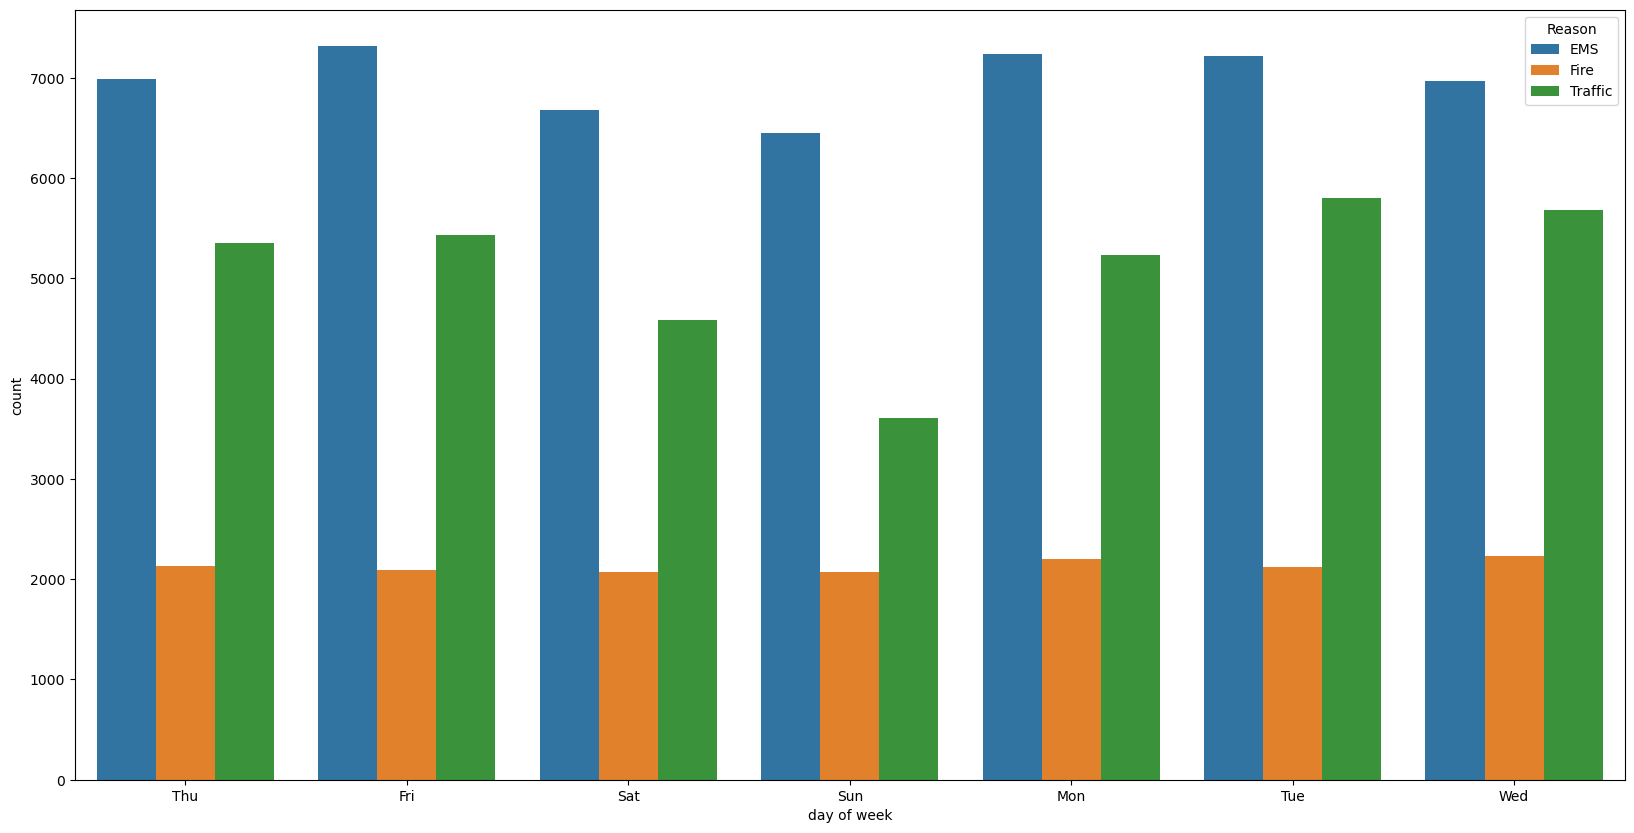

In [24]:
#Now use seaborn to create a countplot of the Day of Week column with the hue based
#off of the Reason column.

plt.figure(figsize=(20,10))
sns.countplot(x='day of week', data=df,hue='Reason')

<Axes: xlabel='month', ylabel='count'>

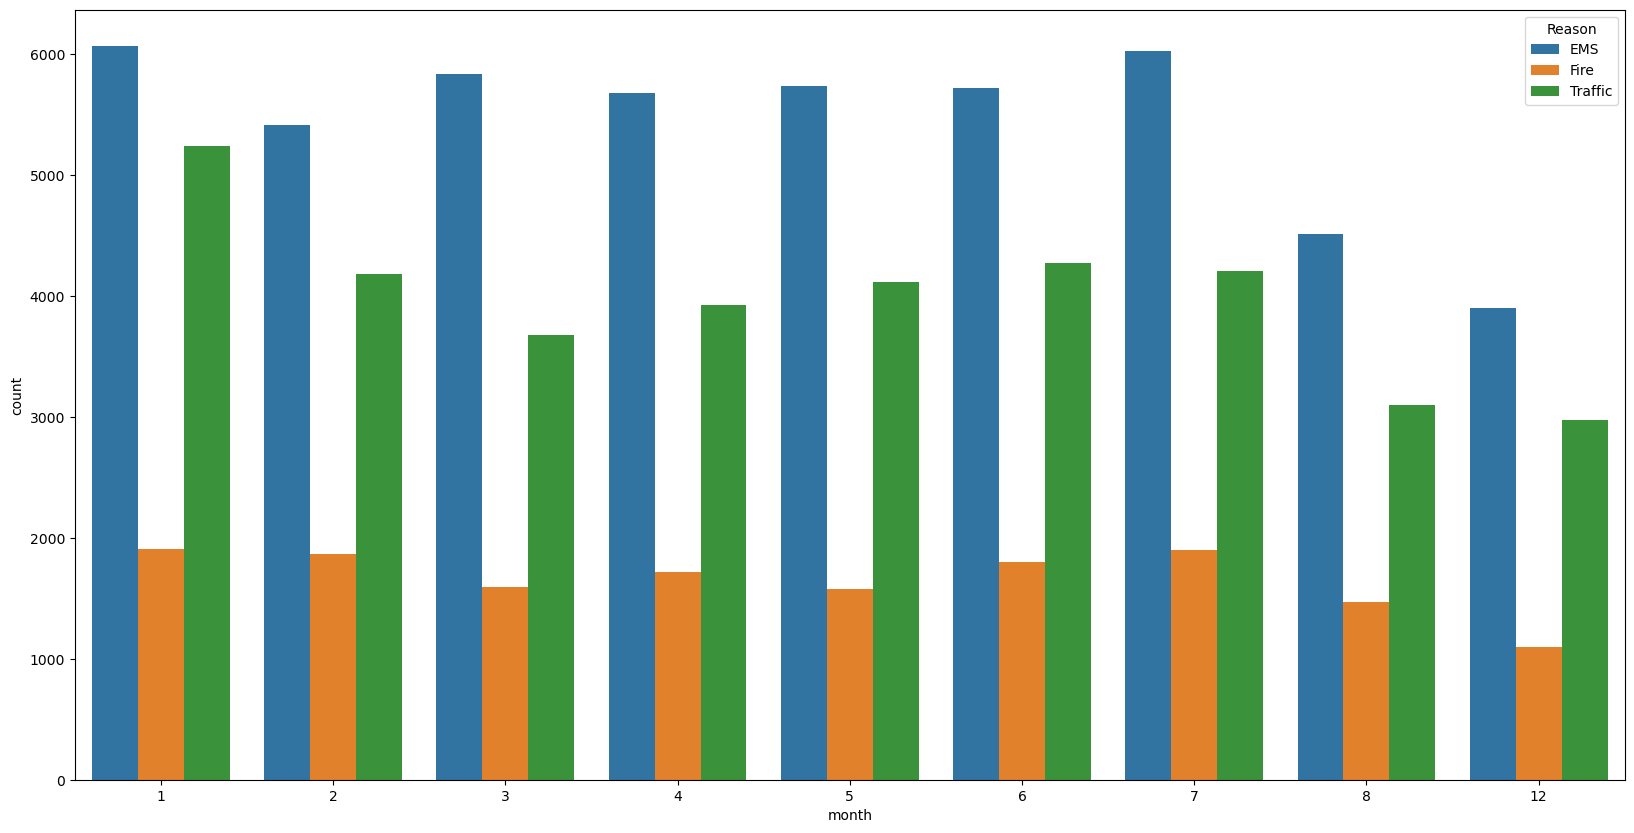

In [25]:
#Now do the same for Month:

plt.figure(figsize=(20,10))
sns.countplot(x='month', data=df,hue='Reason')

In [26]:
#You should have noticed it was missing some Months, let's see if we can maybe fill in
#this information by plotting the information in another way, possibly a simple line
#plot that fills in the missing months
a=np.arange(1,13)
b=
plt.plot(a,b)
plt.title('COUNTS OF CALLS EVERY MONTH')
plt.xlabel('MONTH')
plt.ylabel('COUNTS')
plt.show()

SyntaxError: invalid syntax (1646532332.py, line 5)

In [27]:
#Now create a gropuby object called byMonth, where you group the DataFrame by the
#month column and use the count() method for aggregation. Use the head() method
#on this returned DataFrame.

byMonth=df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<Axes: xlabel='month'>

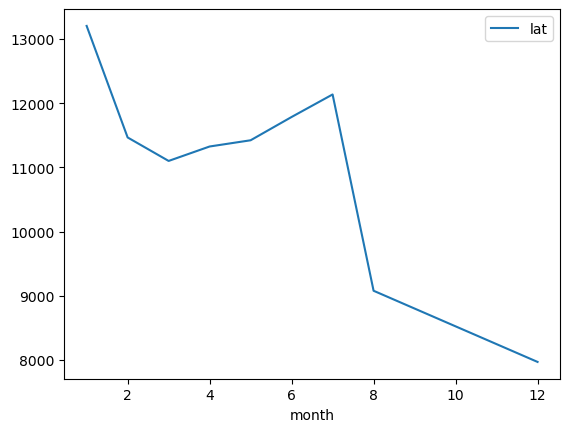

In [28]:
#Create a simple plot off of the dataframe indicating the count of calls per month.


byMonth.reset_index(inplace=True)
byMonth.plot(x='month',y='lat')


In [ ]:
#See if you can use seaborn's lmplot() to create a linear fit on the number of calls per
#month.
